### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Getting the data 
data = pd.read_csv('tr_copy.csv')

#Separating only numeric columns
data = data[['max_floor','num_rooms','area','floor','ceiling_height','price']]

# Show the first 5 rows of the result dataframe
data.head()

,max_floor,num_rooms,area,floor,ceiling_height,price
0,11,2,67.0,9,3.0,72000.0
1,5,3,75.0,2,3.2,80000.0
2,4,4,140.0,4,2.8,204000.0
3,5,3,79.0,3,2.8,68000.0
4,9,1,45.0,2,2.8,39000.0


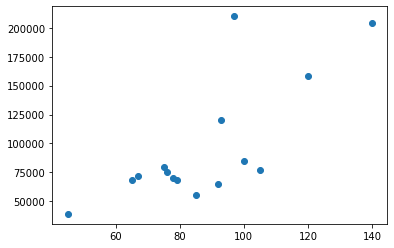

In [3]:
a = data[['area','price']].iloc[:15]

# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go

# # Create a trace
# trace = go.Scatter(
#     x = a['area'],
#     y = a['price'],
#     mode = 'markers'
# )

# data = [trace]

# py.iplot(data, filename='basic-scatter')

plt.scatter(a['area'],a['price']);

In [4]:
print(list(a['area']))


[67.0, 75.0, 140.0, 79.0, 45.0, 100.0, 92.0, 85.0, 93.0, 97.0, 76.0, 120.0, 65.0, 105.0, 78.0]


In [5]:
# Keep the features in df variable
df = data[['max_floor','num_rooms','area','floor','ceiling_height']]

# Keep the y (price) in target_var variable
target_var = data['price']

# Add a new column from left with ones for theta-zero
df.insert(loc=0, column='theta_zero', value=np.ones(len(df)))

#Show the result dataframe
df.head()

,theta_zero,max_floor,num_rooms,area,floor,ceiling_height
0,1.0,11,2,67.0,9,3.0
1,1.0,5,3,75.0,2,3.2
2,1.0,4,4,140.0,4,2.8
3,1.0,5,3,79.0,3,2.8
4,1.0,9,1,45.0,2,2.8


In [6]:
# Define the learning rate
alpha = 0.00001

# Define the number of itterations
n_iter = 100

# Count the number of records
size = df.shape[0]

# Create an array for initial thetas (which are just random numbers)
np.random.seed(2)
thetas = np.random.rand(df.shape[1])

# Create a new array in which will be the values predicted by random thetas
predicted = np.dot(df,thetas)

# Calculate the sum of the squared residuals (loss function)
loss = sum((predicted - target_var)**2)

# Print the results
print("thetas = ",thetas)
print("predicted prices = ",predicted[:4])
print("loss = ",loss)

thetas =  [0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482]
predicted prices =  [35.7614234  36.76159997 66.28989341 38.79112342]
loss =  43003928163803.164


In [7]:
# Create an array in which will be all the loss functions for every step
Losses = []

### Now let's create the model based on this equation

<img src='https://cdn-images-1.medium.com/max/720/1*G3evFxIAlDchOx5Wl7bV5g.png'>

In [8]:
# This loop is the same as in this picture. The difference is that I have 6 thetas instead of 2
for i in np.arange(n_iter):
    thetas[0] = thetas[0] - alpha*(1/size)*sum(predicted - target_var)
    thetas[1] = thetas[1] - alpha*(1/size)*sum((predicted - target_var)*df['max_floor'])
    thetas[2] = thetas[2] - alpha*(1/size)*sum((predicted - target_var)*df['num_rooms'])
    thetas[3] = thetas[3] - alpha*(1/size)*sum((predicted - target_var)*df['area'])
    thetas[4] = thetas[4] - alpha*(1/size)*sum((predicted - target_var)*df['floor'])
    thetas[5] = thetas[5] - alpha*(1/size)*sum((predicted - target_var)*df['ceiling_height'])

    
    # Update the predicted values based on changed thetas
    predicted = np.dot(df,thetas)
    
    # Calculate the loss again based on changed thetas
    loss = sum((predicted - target_var)**2)
    
    # Add every new loss in this array (we are in the loop, don't forget :) 
    Losses.append(loss)

In [9]:


# # This loop is the same as in this picture. The difference is that I have 6 thetas instead of 2
# for i in np.arange(n_iter):
#     thetas[0] = thetas[0] - (alpha*(1/size)*sum(predicted - target_var) + lamda* thetas[0]/np.sqrt(sum(thetas**2)) )
#     thetas[1] = thetas[1] - (alpha*(1/size)*sum((predicted - target_var)*df['max_floor']) + lamda* thetas[1]/np.sqrt(sum(thetas**2)))
#     thetas[2] = thetas[2] - (alpha*(1/size)*sum((predicted - target_var)*df['num_rooms']) + lamda* thetas[2]/np.sqrt(sum(thetas**2)))
#     thetas[3] = thetas[3] - (alpha*(1/size)*sum((predicted - target_var)*df['area']) + lamda* thetas[3]/np.sqrt(sum(thetas**2)))
#     thetas[4] = thetas[4] - (alpha*(1/size)*sum((predicted - target_var)*df['floor']) + lamda* thetas[4]/np.sqrt(sum(thetas**2)))
#     thetas[5] = thetas[5] - (alpha*(1/size)*sum((predicted - target_var)*df['ceiling_height']) + lamda* thetas[5]/np.sqrt(sum(thetas**2)))

    
#     # Update the predicted values based on changed thetas
#     predicted = np.dot(df,thetas)
    
#     # Calculate the loss again based on changed thetas
#     loss = sum((predicted - target_var)**2) + lamda * np.sqrt(sum(thetas**2))
    
#     # Add every new loss in this array (we are in the loop, don't forget :) 
#     Losses.append(loss)

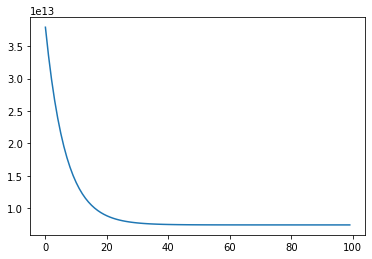

In [10]:
# We can plot the array filled with losses
plt.plot(Losses)

In [11]:
print("Mean of errors =",np.sqrt(loss)/size)
print("Thetas =", thetas)
print("Minimum loss function = ", loss)

Mean of errors = 652.0042449549925
Thetas = [  10.2869281    93.01702526   28.36819433 1066.13619967   56.16656613
   31.12709411]
Minimum loss function =  7413474985897.624
